<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
sample = pd.read_csv('sample_submission.csv')

In [9]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
def check_null(data_frame):
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                print("|",col,"  ---->  ",data_frame[col].isnull().sum(),"\n","_______________________________")
            else:
                pass

In [13]:
def null_columns(data_frame):
        null_col_list = []
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                null_col_list.append(col)
            else:
                pass
        print(null_col_list)

In [14]:
check_null(train)

| LotFrontage   ---->   259 
 _______________________________
| Alley   ---->   1369 
 _______________________________
| MasVnrType   ---->   8 
 _______________________________
| MasVnrArea   ---->   8 
 _______________________________
| BsmtQual   ---->   37 
 _______________________________
| BsmtCond   ---->   37 
 _______________________________
| BsmtExposure   ---->   38 
 _______________________________
| BsmtFinType1   ---->   37 
 _______________________________
| BsmtFinType2   ---->   38 
 _______________________________
| Electrical   ---->   1 
 _______________________________
| FireplaceQu   ---->   690 
 _______________________________
| GarageType   ---->   81 
 _______________________________
| GarageYrBlt   ---->   81 
 _______________________________
| GarageFinish   ---->   81 
 _______________________________
| GarageQual   ---->   81 
 _______________________________
| GarageCond   ---->   81 
 _______________________________
| PoolQC   ---->   1453 
 ___________

In [15]:
null_columns(train)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [25]:
train1 = train

In [26]:
test1 = test

## LotFrontage

In [16]:
train.LotFrontage.value_counts(dropna = False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
111.0      1
141.0      1
112.0      1
152.0      1
144.0      1
Name: LotFrontage, Length: 111, dtype: int64

C:\Users\gulfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


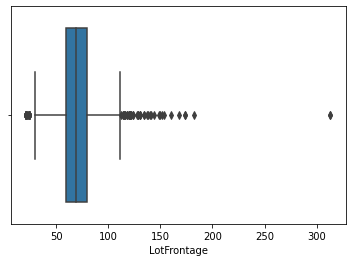

In [17]:
sns.boxplot(train.LotFrontage);

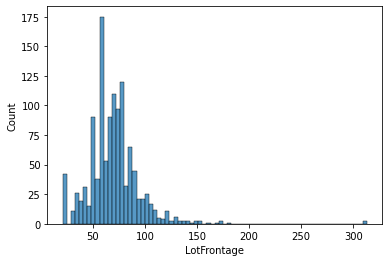

In [18]:
sns.histplot(train.LotFrontage);

In [27]:
train.LotFrontage.mean()

70.04995836802665

In [28]:
train[train.LotFrontage.isnull()].LotFrontage.mean()

nan

In [29]:
train.LotFrontage.fillna(train.LotFrontage.mean(), inplace=True)

In [30]:
train.LotFrontage.value_counts(dropna = False)

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
112.000000      1
138.000000      1
149.000000      1
38.000000       1
111.000000      1
Name: LotFrontage, Length: 111, dtype: int64

## Alley

In [32]:
train.Alley.value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

C:\Users\gulfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


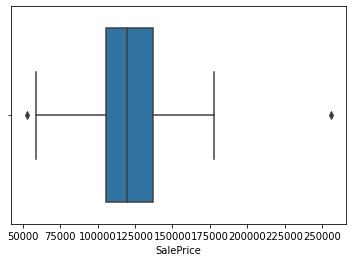

In [37]:
sns.boxplot(train[train.Alley == 'Grvl'].SalePrice);

C:\Users\gulfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


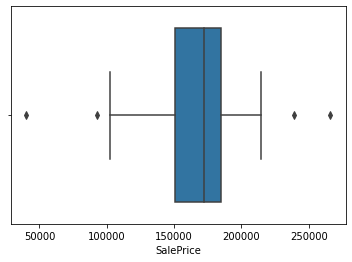

In [39]:
sns.boxplot(train[train.Alley == 'Pave'].SalePrice);

In [43]:
train[train.Alley == 'Pave'].SalePrice.mean()

168000.58536585365

In [42]:
train[train.Alley == 'Grvl'].SalePrice.mean()

122219.08

In [41]:
train[train.Alley.isnull()].SalePrice.mean()

183452.13148283417

C:\Users\gulfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


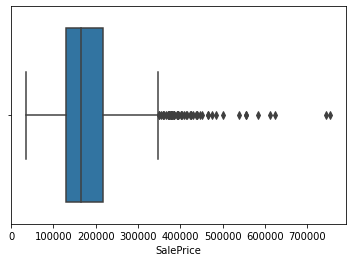

In [40]:
sns.boxplot(train[train.Alley.isnull()].SalePrice);

In [45]:
train.drop('Alley', axis = 1, inplace = True)

## MasVnrType

In [48]:
train.MasVnrType.value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [53]:
train.MasVnrType.fillna('None', inplace = True)

In [54]:
train.MasVnrType.value_counts(dropna = False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

## MasVnrArea

In [56]:
train.MasVnrArea.value_counts(dropna = False)

0.0      861
72.0       8
180.0      8
108.0      8
NaN        8
        ... 
388.0      1
426.0      1
653.0      1
796.0      1
415.0      1
Name: MasVnrArea, Length: 328, dtype: int64

C:\Users\gulfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


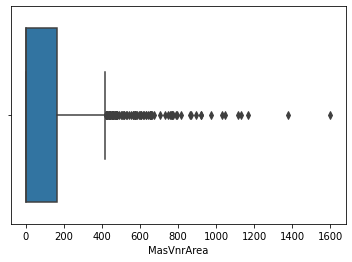

In [58]:
sns.boxplot(train.MasVnrArea);

In [61]:
train.MasVnrArea.fillna(0, inplace = True)

In [62]:
null_columns(train)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## BsmtQual

In [65]:
train.BsmtQual.value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

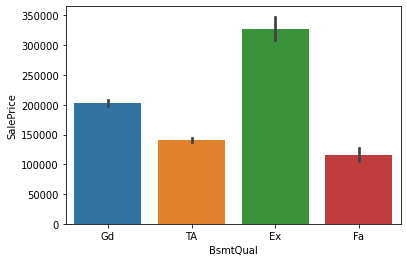

In [67]:
sns.barplot(x = train.BsmtQual, y = train.SalePrice);

C:\Users\gulfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


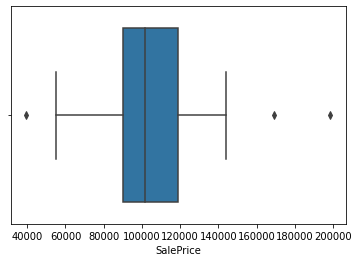

In [69]:
sns.boxplot(train[train.BsmtQual.isnull()].SalePrice);

In [74]:
train.BsmtQual.fillna('NoBsmt', inplace = True)

In [75]:
null_columns(train)

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## BsmtCond

In [78]:
train.BsmtCond.value_counts(dropna = False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [79]:
train.BsmtCond.fillna('NoBsmt', inplace = True)

In [80]:
train.BsmtCond.value_counts(dropna = False)

TA        1311
Gd          65
Fa          45
NoBsmt      37
Po           2
Name: BsmtCond, dtype: int64

## BsmtExposure

In [82]:
train.BsmtExposure.value_counts(dropna = False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [83]:
train.BsmtExposure.fillna('NoBsmt', inplace = True)

In [84]:
train.BsmtExposure.value_counts(dropna = False)

No        953
Av        221
Gd        134
Mn        114
NoBsmt     38
Name: BsmtExposure, dtype: int64

## BsmtFinType1

In [85]:
train.BsmtFinType1.value_counts(dropna = False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [86]:
train.BsmtFinType1.fillna('NoBsmt', inplace = True)

## BsmtFinType2

In [87]:
train.BsmtFinType2.value_counts(dropna = False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [88]:
train.BsmtFinType2.fillna('NoBsmt', inplace = True)

In [89]:
train.BsmtFinType2.value_counts(dropna = False)

Unf       1256
Rec         54
LwQ         46
NoBsmt      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [90]:
null_columns(train)

['Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
